In [2]:
#First let's install the statsbombpy library and import sb from it. Also we need to import pandas
!pip install statsbombpy
from statsbombpy import sb
import pandas as pd

In [3]:
#We're now definying our game that will be analysed, the final game of the world cup final is the below code. And we must import all the events that happened in that game 

final_copa_2022 = [3869685]

events = []
for n in final_copa_2022:
  match_events = sb.events(match_id = n)
  events.append(match_events)
  match_events_df = pd.concat(events)

c:\Users\victo\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [4]:
#importing some more important libraries

import requests as req
import statsbombpy.entities as ents
from statsbombpy.config import OPEN_DATA_PATHS


In [5]:
# Follow the statsbomb tutorial on how to get their data throught their API. This data will give us the 360 Data, will inform freeze by freeze 
# where were all the player and the ball in a certain time 

def get_response(path):
    response = req.get(path)
    response.raise_for_status()
    data = response.json()
    return data

def frames(match_id: int) -> dict:
    path = OPEN_DATA_PATHS["frames"].format(match_id=match_id)
    frames = get_response(path)
    frames = ents.frames(frames, match_id)
    return frames

In [6]:
#Putting the 360 data into a dataframe

final_copa_2022 = 3869685
match_360 = pd.DataFrame(frames(final_copa_2022))
match_360

,event_uuid,visible_area,freeze_frame,match_id
0,f651a6c4-55e3-4e0f-a178-59414ba83d6a,"[8.98496759714251, 80.0, 41.4622037211361, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ...",3869685
1,97b5dc82-547a-4f93-a632-a2a8daf5ac98,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ...",3869685
2,9707e590-1d55-4d25-a50f-475019356152,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ...",3869685
3,a5956ecc-d637-44d2-8705-e2079e12013e,"[10.227276315524, 80.0, 41.5155332886657, 0.0,...","[{'teammate': True, 'actor': False, 'keeper': ...",3869685
4,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,"[13.2232254880239, 80.0, 0.0, 65.4802459369524...","[{'teammate': True, 'actor': False, 'keeper': ...",3869685
...,...,...,...,...
3678,97439112-dfb5-4bd5-9967-554095296096,"[74.8245066203564, 80.0, 65.5827051836776, 11....","[{'teammate': True, 'actor': True, 'keeper': F...",3869685
3679,50dcde1a-faa3-4eec-a0cd-3f09a7cf763a,"[71.7859219296227, 80.0, 72.1109742638867, 8.9...","[{'teammate': True, 'actor': True, 'keeper': F...",3869685
3680,54e27ba9-b9ae-44a3-ac8d-fc91e76a1b91,"[6.10280272391214, 80.0, 37.1010455294984, 7.9...","[{'teammate': True, 'actor': True, 'keeper': F...",3869685
3681,bcc6d4ae-f71c-4566-bf2d-c12f910eb526,"[6.0830318986702, 80.0, 35.2414826693926, 9.61...","[{'teammate': True, 'actor': True, 'keeper': F...",3869685


In [7]:
#Merging the events of the game with the 360 data

df = pd.merge(left = match_events_df, right = match_360 , left_on = 'id', right_on = 'event_uuid', how = 'left')

In [8]:
df.columns



Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id_x', 'minute',
       'off_camera', 'out', 'pass_aerial_won', 'pass_angle',
       'pass_assisted

In [9]:
#For our analysis, we're going to look deeper on how messi passes were in this particularly match 

Messi_id = int(df[df['player'] == 'Lionel Andrés Messi Cuccittini']['player_id'].unique())

messi_shots = df[(df['player_id'] == Messi_id) & (df['type'] == 'Shot')]

# getting the start location of Messi whenever he tried a pass. 

x_loc=[]
y_loc =[]
for row in messi_shots['location']:
    x_loc.append(row[0])
    y_loc.append(row[1])

messi_shots['x_loc_start'] = x_loc
messi_shots['y_loc_start'] = y_loc


#Now we are getting the end location of his passes. 

messi_shots['shot_end_location']

x_loc_end =[]
y_loc_end = [] 

for row in messi_shots['shot_end_location']:
    x_loc_end.append(row[0])
    y_loc_end.append(row[1])

messi_shots['x_loc_end'] = x_loc_end
messi_shots['y_loc_end'] = y_loc_end


C:\Users\victo\AppData\Local\Temp\ipykernel_12112\2370567121.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messi_shots['x_loc_start'] = x_loc
C:\Users\victo\AppData\Local\Temp\ipykernel_12112\2370567121.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messi_shots['y_loc_start'] = y_loc
C:\Users\victo\AppData\Local\Temp\ipykernel_12112\2370567121.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [31]:
#Installing the mplsoccer library in order to get the pitch draw and better visualization to help our analysis

!pip install mplsoccer
from mplsoccer import VerticalPitch 


In [57]:
# We'll filter messi's passes in two categories: right and wrong shots and their xG
import math

xG_messi_shot = messi_shots['shot_statsbomb_xg']
xG_messi_shot  = xG_messi_shot.round(2)

goal_shots = messi_shots['shot_outcome'].loc[messi_shots['shot_outcome'] == 'Goal']
non_goal_shots = messi_shots['shot_outcome'].loc[messi_shots['shot_outcome'] != 'Goal']









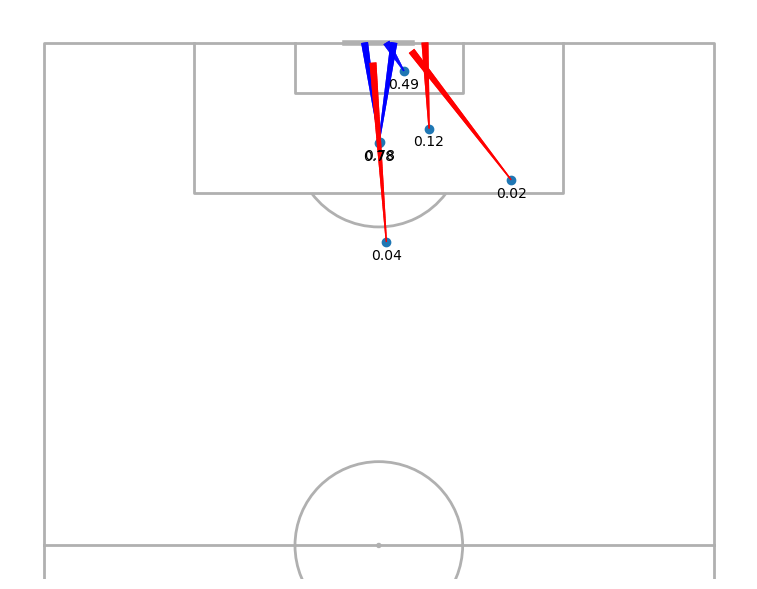

In [63]:
#Plotting the pitch with the right passes in green and wrong ones in red. It's important to notice that the Messi's squad is always attacking to the right side of the pitch in this case. 

p = VerticalPitch(pitch_type= 'statsbomb', half = True)

fig, ax = p.draw(figsize=(8,6))

p.scatter(x = messi_shots['x_loc_start'], y = messi_shots['y_loc_start'], ax=ax)

for y,x,j in zip(messi_shots['x_loc_start'],messi_shots['y_loc_start'],xG_messi_shot ):
    p.text((y-1.5), x,j, va='center', ha='center', ax=ax)

p.lines(xstart = messi_shots['x_loc_start'][goal_shots.index], ystart=messi_shots['y_loc_start'][goal_shots.index], xend= messi_shots['x_loc_end'][goal_shots.index], yend= messi_shots['y_loc_end'][goal_shots.index], ax=ax, comet= True, color = 'blue')
p.lines(xstart = messi_shots['x_loc_start'][non_goal_shots.index], ystart=messi_shots['y_loc_start'][non_goal_shots.index], xend= messi_shots['x_loc_end'][non_goal_shots.index], yend= messi_shots['y_loc_end'][non_goal_shots.index], ax=ax, comet= True, color = 'red')
